![title](https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fdyclassroom.files.wordpress.com%2F2019%2F09%2Fmongodb.jpg&f=1&nofb=1)

# Unstrukturierte Daten in einer MongoDB auslesen und auswerten


1. [Übersicht](#Uebersicht)
    1. [Einführung in die dokumentenorientierte MongoDB](#Einführung)
    2. [Ziel dieses Notebooks](#Ziel)
2. [MongoDB Grundlagen](#Grundlagen)
    1. [Starten der MongoDB und Verbdindung herstellen](#Start)
    2. [Importieren eines JSON Datensatzes](#JSON-Einlesen)
    3. [Lesen, speichern, updaten und löschen von Daten](#CRUD)
3. [Betrachten des Datenbestandes](#Datenbestand)
4. [Auslesen und Zusammenhänge herausfinden mit der Aggregation Pipeline](#Pipeline)
5. [Auslesen und Zusammenhänge herausfinden mit dem Map-Reduce Verfahren](#Map)

## 1. <b id="Uebersicht">Übersicht</b>

Text...

## 2. <b id="Grundlagen">Grundlagen</b>

<div class="alert alert-block alert-info">
<b>Starten der MongoDB</b>
</div>

In [ ]:
#!mongod --config /home/jovyan/mongod.conf

<div class="alert alert-block alert-info">
<b>Alle notwendigen Python-Module laden</b>
</div>

In [18]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pymongo
from bson.son import SON
from bson.objectid import ObjectId
from pprint import pprint

<div class="alert alert-block alert-info">
<b>Verbindung zur MongoDB herstellen</b>
</div>

In [19]:
client = pymongo.MongoClient()
client.list_database_names()

['Hotels', 'admin', 'config', 'local']

<div class="alert alert-block alert-info">
<b>Eine Datenbank "Hotels" und eine Kollektion "booking" wird angelegt</b>
</div>

In [20]:
mydb = client["Hotels"]
mycol = mydb["booking"]

### 2.2 <b id="JSON-Einlesen">Importieren eines JSON Datensatzes</b>

<div class="alert alert-block alert-warning">
<b>Datensatz über Hotels wird importiert -> ist später im MongoDB Image enthalten</b>
</div>

In [184]:
#!mongoimport --db Hotels --collection booking --file Hotel.json

df = pd.DataFrame(pd.read_json("Hotel.json", lines = True))
df

,_id,pageurl,record
0,{'$oid': '5fcff663af46073dc3a40590'},https://www.booking.com/hotel/in/oyo-23501-log...,"{'hotel_id': 4521185, 'hotel_name': 'OYO 23501..."
1,{'$oid': '5fcff663af46073dc3a40591'},https://www.booking.com/hotel/in/dream-house-g...,"{'hotel_id': 5617914, 'hotel_name': 'Dream hou..."
2,{'$oid': '5fcff663af46073dc3a40592'},https://www.booking.com/hotel/in/the-courtyard...,"{'hotel_id': 4705753, 'hotel_name': 'The Court..."
3,{'$oid': '5fcff663af46073dc3a40593'},https://www.booking.com/hotel/in/paradise-room...,"{'hotel_id': 4048734, 'hotel_name': 'Paradise ..."
4,{'$oid': '5fcff663af46073dc3a40594'},https://www.booking.com/hotel/in/hadimba-way.e...,"{'hotel_id': 4864429, 'hotel_name': 'Hotel Had..."
...,...,...,...
405,{'$oid': '5fcff663af46073dc3a40725'},https://www.booking.com/hotel/in/oyo-29093-a3-...,"{'hotel_id': 5323088, 'hotel_name': 'OYO 29093..."
406,{'$oid': '5fcff663af46073dc3a40726'},https://www.booking.com/hotel/in/oyo-home-4867...,"{'hotel_id': 5564364, 'hotel_name': 'Cosy 1BR ..."
407,{'$oid': '5fcff663af46073dc3a40727'},https://www.booking.com/hotel/in/riverfront.en...,"{'hotel_id': 1621858, 'hotel_name': 'OYO Flags..."
408,{'$oid': '5fcff663af46073dc3a40728'},https://www.booking.com/hotel/in/bastian-homes...,"{'hotel_id': 398572, 'hotel_name': 'Bastian Ho..."


### 2.3 <b id="Grundlagen">MongoDB Grundlagen</b>
<div class="alert alert-block alert-info">
<b>Einfügen eines einzelnen Dokumentes</b>
</div>

In [ ]:
example = {
    "name" : "Jupyter Notebook",
    "created_on":{"date":"2020-12-11"},
    "programming_language" : {
        "name":       "Python 3",   
        "version":      "3.8.6",  
    }  
}
pprint(example)

In [ ]:
id = mycol.insert_one(example).inserted_id
pprint(id)

<div class="alert alert-block alert-info">
<b>Auslesen eines einzelnen Dokumentes</b>
</div>

In [ ]:
filter = {'_id': ObjectId('5fd3cd750424abfb0e35db3e')}

inserted_Document = mycol.find(filter)
for document in inserted_Document:
    pprint(document)

<div class="alert alert-block alert-info">
<b>Updaten eines Dokumentes anhand einer Query</b>
</div>

In [21]:
filter = {'_id': ObjectId('5fd3cd750424abfb0e35db3e')} 
newvalue = { "$set": { 'name': "Test Notebook" } } 

inserted_Document = mycol.update_one(filter,newvalue)

# Suche nach dem Dokument wiederholen um die Veränderung zu sehen
filter = {'_id': ObjectId('5fd3cd750424abfb0e35db3e')}
inserted_Document = mycol.find(filter)
for document in inserted_Document:
    pprint(document)

<div class="alert alert-block alert-info">
<b>Delete eines Dokumentes anhand einer Query</b>
</div>

In [24]:
filter = {'_id': ObjectId('5fd3cd750424abfb0e35db3e')}
mycol.delete_one(filter) 

<div class="alert alert-block alert-info">
<b>Nach mehreren Dokumenten suchen</b>
</div>

In [34]:
for document in mycol.find().sort("_id",pymongo.ASCENDING).limit(20):
  pprint(document) 

{'_id': ObjectId('5fcff663af46073dc3a40590'),
 'pageurl': 'https://www.booking.com/hotel/in/oyo-23501-log-inn-plaza-pune1234567.en-gb.html?label=gen173nr-1DCAQoggJCC3NlYXJjaF9wdW5lSAlYBGiJAogBAZgBCbgBGMgBDNgBA-gBAfgBA4gCAagCBLgCz6L57gXAAgE&sid=19a33d68c207e93e9dac9118162363b5&all_sr_blocks=452118503_219215256_2_1_0&checkin=2019-12-02&checkout=2019-12-03&dest_id=-2108361&dest_type=city&group_adults=2&group_children=0&hapos=192&highlighted_blocks=452118503_219215256_2_1_0&hpos=17&no_rooms=1&sr_order=popularity&srepoch=1574851182&srpvid=c6504af60e530124&ucfs=1&from=searchresults;highlight_room=&;selected_currency=INR;changed_currency=1;top_currency=1',
 'record': {'checkin_date': datetime.datetime(2019, 12, 2, 0, 0),
            'crawled_date': datetime.datetime(1970, 1, 1, 0, 0),
            'default_rank': 208,
            'hotel_id': 4521185,
            'hotel_name': 'OYO 23501 Log Inn Plaza',
            'ota': 'booking.com',
            'price_rank': 147,
            'review_count':

## 3. <b id="Datenbestand">Betrachten des Datenbestandes</b>

<div class="alert alert-block alert-info">
<b>Alle Dokumente mit Pandas überschaubar auszugeben führt zu einem Problem</b>
</div>

Dadurch das viele Danten im JSON Datenformat eingebettet werden, kann Pandas hier nur das Dokument "record" wirdergeben und nicht die Daten die darin enthalten sind. Hierzu müssten die Daten genauer angefragt werden um diese überschaubar zu gestalten.

In [192]:
mongo_json = mycol.find({})
print(type(mongo_json))

<class 'pymongo.cursor.Cursor'>


In [193]:
df = pd.DataFrame.from_records(mongo_json)
df

,_id,pageurl,record
0,5fcff663af46073dc3a40590,https://www.booking.com/hotel/in/oyo-23501-log...,"{'hotel_id': 4521185, 'hotel_name': 'OYO 23501..."
1,5fcff663af46073dc3a40592,https://www.booking.com/hotel/in/the-courtyard...,"{'hotel_id': 4705753, 'hotel_name': 'The Court..."
2,5fcff663af46073dc3a40591,https://www.booking.com/hotel/in/dream-house-g...,"{'hotel_id': 5617914, 'hotel_name': 'Dream hou..."
3,5fcff663af46073dc3a40594,https://www.booking.com/hotel/in/hadimba-way.e...,"{'hotel_id': 4864429, 'hotel_name': 'Hotel Had..."
4,5fcff663af46073dc3a40597,https://www.booking.com/hotel/in/1-bhk-in-colv...,"{'hotel_id': 3246423, 'hotel_name': 'Apartment..."
...,...,...,...
405,5fcff663af46073dc3a40727,https://www.booking.com/hotel/in/riverfront.en...,"{'hotel_id': 1621858, 'hotel_name': 'OYO Flags..."
406,5fcff663af46073dc3a40729,https://www.booking.com/hotel/in/sai-dip.en-gb...,"{'hotel_id': 4296075, 'hotel_name': 'Sai Dip',..."
407,5fcff663af46073dc3a40728,https://www.booking.com/hotel/in/bastian-homes...,"{'hotel_id': 398572, 'hotel_name': 'Bastian Ho..."
408,5fcff663af46073dc3a40724,https://www.booking.com/hotel/in/hilton-jaipur...,"{'hotel_id': 1039091, 'hotel_name': 'Hilton Ja..."


<div class="alert alert-block alert-info">
<b>Projektion der Daten</b>
</div>

Eine Projekt wird durchgeführt um nur das Embedded Document anzuzeigen. Pandas zeigt aber weiterhin ein Dokument an und nicht die gewünschten Daten.

In [167]:
mongo_json = mycol.find({},{"_id":0,"record.price_rank":1})
df = pd.DataFrame.from_records(mongo_json)
df

<class 'pymongo.cursor.Cursor'>


,record
0,{'price_rank': 147}
1,{'price_rank': 366}
2,{'price_rank': 0}
3,{'price_rank': 5}
4,{'price_rank': 923}
...,...
405,{'price_rank': 168}
406,{'price_rank': 172}
407,{'price_rank': 43}
408,{'price_rank': 818}


In [283]:
mongo_json = mycol.find({})

#for x in mongo_json:
 #   pprint(type(x))
    

In [303]:
md1 = []
mongo_data1 = {}
keys = ['price_rank', 'review_count', 'hotel_id' , "hotel_name", "default_rank", "ota", "room_type"]
for key in keys:
    mongo_json = mycol.find({})
    for x in mongo_json:
        md1.append(x["record"].get(key))
    mongo_data1.update({key:list(md1)})
    md1 = []

mongo_dataframe = pd.DataFrame(mongo_data1)
mongo_dataframe

,price_rank,review_count,hotel_id,hotel_name,default_rank,ota,room_type
0,147,1.0,4521185,OYO 23501 Log Inn Plaza,208,booking.com,"[{'room_type_name': 'Small Double Room', 'room..."
1,366,2.0,4705753,The Courtyard Apartments,103,booking.com,[{'room_type_name': 'Apartment with Pool View ...
2,0,NaN,5617914,Dream house. G-72/2,1094,booking.com,"[{'room_type_name': 'One-Bedroom Apartment', '..."
3,5,6.0,4864429,Hotel Hadimba Way,0,booking.com,"[{'room_type_name': 'Budget Double Room', 'roo..."
4,923,NaN,3246423,"Apartment with a pool in Colva, Goa, by GuestH...",775,booking.com,"[{'room_type_name': 'One-Bedroom Apartment', '..."
...,...,...,...,...,...,...,...
405,168,21.0,1621858,OYO Flagship 36844 Riverfront,167,booking.com,"[{'room_type_name': 'Standard Double Room', 'r..."
406,172,7.0,4296075,Sai Dip,64,booking.com,"[{'room_type_name': 'Deluxe Queen Room', 'room..."
407,43,377.0,398572,Bastian Homestay,92,booking.com,[{'room_type_name': 'Budget Double Room with F...
408,818,894.0,1039091,Hilton Jaipur,1,booking.com,"[{'room_type_name': 'Twin Room', 'room_type_pr..."


<AxesSubplot:>

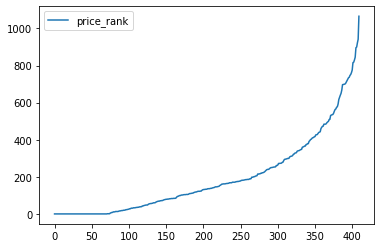

In [254]:
mongo_dataframe.sort_values(by="price_rank")
mongo_dataframe.plot()

In [327]:
df = pd.DataFrame.from_records(mycol.find({},{"record.room_type":1}))

md1 = []
keys= ['room_type_name', 'room_type_price', 'room_type_occupancy' , "room_type_breakfast", "room_type_cancellation"]
mongo_json = mycol.find({})
for x in mongo_json:
    md1.append(x["record"].get("room_type"))

for i in md1[1]:
    for key in keys:
        pprint(i.get(key))

'Apartment with Pool View '
1680.0
2
'Room Only'
'non_refundable'


<div class="alert alert-block alert-danger">
Der Teil der hier unten kommt ist momentan nur zum testen
</div>

In [28]:
print(mongo_dataframe.dtypes)

_id        object
pageurl    object
record     object
dtype: object


In [30]:
rankLabels = [1000,800,600,400,200,0]
print("Beschriftung: {}".format(rankLabels))
countDefaultRank = []
countDefaultRank.append(mycol.count_documents({"record.default_rank":{"$gt": 1000}}))
countDefaultRank.append(mycol.count_documents({"record.default_rank":{"$gt": 800, "$lt": 1000}}))
countDefaultRank.append(mycol.count_documents({"record.default_rank":{"$gt": 600, "$lt": 800}}))
countDefaultRank.append(mycol.count_documents({"record.default_rank":{"$gt": 400, "$lt": 600}}))
countDefaultRank.append(mycol.count_documents({"record.default_rank":{"$gt": 200, "$lt": 400}}))
countDefaultRank.append(mycol.count_documents({"record.default_rank":{"$gt": -1, "$lt": 200}}))
print("Anzahl: {}".format(countDefaultRank))

Beschriftung: [1000, 800, 600, 400, 200, 0]
Anzahl: [2, 8, 18, 31, 84, 266]


#### Eine Übersicht über die Daten wird generiert

Anzahl der Hotels nach Niveau/Bewertung


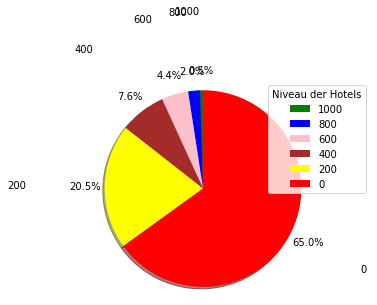

In [31]:
mycolors = ["green", "blue", "pink", "brown","yellow", "red"]

print("\033[1m" + 'Anzahl der Hotels nach Niveau/Bewertung' + "\033[0m")
plt.pie(countDefaultRank, labels=rankLabels, autopct='%1.1f%%',shadow=True,startangle = 90, pctdistance=1.2, labeldistance=1.8 ,colors = mycolors)
plt.axis('equal')
plt.legend(title = "Niveau der Hotels")
plt.show()

In [32]:
pipeline = [
    {"$group": {"_id": "$record.ota", "count": {"$sum": 1}}},
     {"$sort": SON([("count", -1), ("_id", -1)])}
]

pprint(list(mycol.aggregate(pipeline)))

[{'_id': 'booking.com', 'count': 410}]
